In [3]:
df <- read.csv(file = 'train.csv')

In [4]:
head(df)

ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0


In [5]:
library("DALEX")
library("randomForest")
library("ceterisParibus")
set.seed(59)

# set default theme
theme_set(theme_bw() + theme(text = element_text(size = 18)))

Welcome to DALEX (version: 0.2.3).
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin

Loading required package: gower


In [6]:
df <- read.csv(file = "train.csv")

In [7]:
df <- df[sample(nrow(df)),]

In [8]:
head(df)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
11,16,0.62739,0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
184,273,0.11460,20,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73,24.4
289,445,12.80230,0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
238,360,4.26131,0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
206,309,0.49298,0,9.90,0,0.544,6.635,82.5,3.3175,4,304,18.4,396.90,4.54,22.8
262,399,38.35180,0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0


In [9]:
nrow(df)

[1] 333

In [10]:
left <- nrow(df) - 100
housing_test <- df[left:nrow(df),]
housing_train <- df[1:(left - 1),]

In [11]:
head(housing_test)
head(housing_train)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
191,285,0.00906,90,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
10,15,0.63796,0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
88,128,0.25915,0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19,16.2
80,119,0.13058,0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37,20.4
78,117,0.13158,0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04,21.2
318,482,5.70818,0,18.10,0,0.532,6.750,74.9,3.3317,24,666,20.2,393.07,7.74,23.7


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
11,16,0.62739,0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
184,273,0.11460,20,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73,24.4
289,445,12.80230,0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
238,360,4.26131,0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
206,309,0.49298,0,9.90,0,0.544,6.635,82.5,3.3175,4,304,18.4,396.90,4.54,22.8
262,399,38.35180,0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0


In [14]:
library("e1071")

In [15]:
housing_rf_model <- randomForest(medv ~ crim + zn + indus + chas + nox + rm + age + dis 
                                 + rad + tax + ptratio + black + lstat, 
                        data = housing_train)

housing_svm <- svm(medv ~ crim + zn + indus + chas + nox + rm + age + dis 
                                 + rad + tax + ptratio + black + lstat, 
                        data = housing_train)

In [16]:
explainer_rf <- explain(housing_rf_model,
                        data = housing_test[,3:ncol(housing_test) - 1], 
                        y = housing_test$medv)
explainer_svm <- explain(housing_svm,
                        data = housing_test[,3:ncol(housing_test) - 1], 
                        y = housing_test$medv
                       )

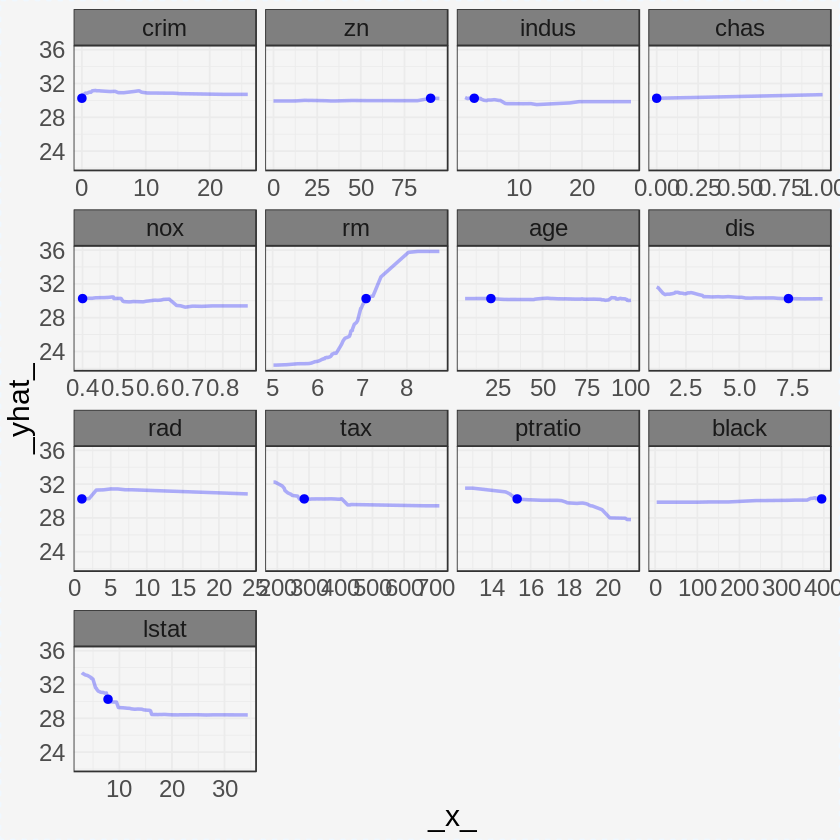

In [17]:
house_A <- housing_test[1,]
cp_rf_A <- ceteris_paribus(explainer_rf, house_A)

plot(cp_rf_A, color="blue")

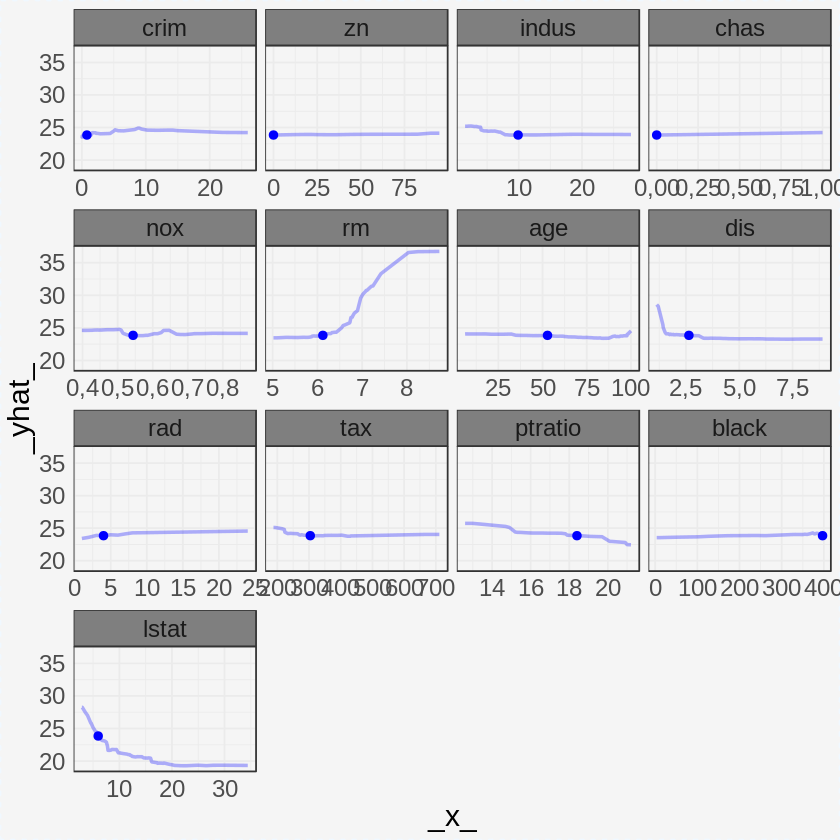

In [18]:
house_A <- housing_test[10,]
cp_rf_A <- ceteris_paribus(explainer_rf, house_A)

plot(cp_rf_A, color="blue")

In [19]:
explainer_svm <- explain(housing_svm,
                        data = housing_test[,3:ncol(housing_test) - 1], 
                        y = housing_test$medv)

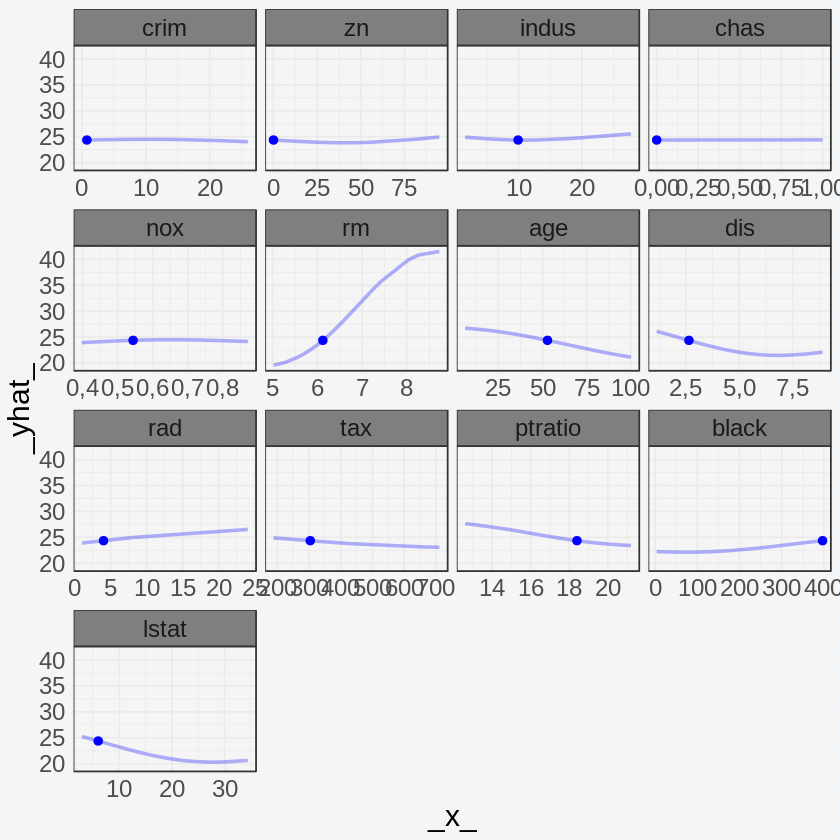

In [20]:
cp_svm_A <- ceteris_paribus(explainer_svm, house_A)

plot(cp_svm_A, color="blue")

In [21]:
house_B <- select_neighbours(housing_test, housing_test[2,], n = 10)

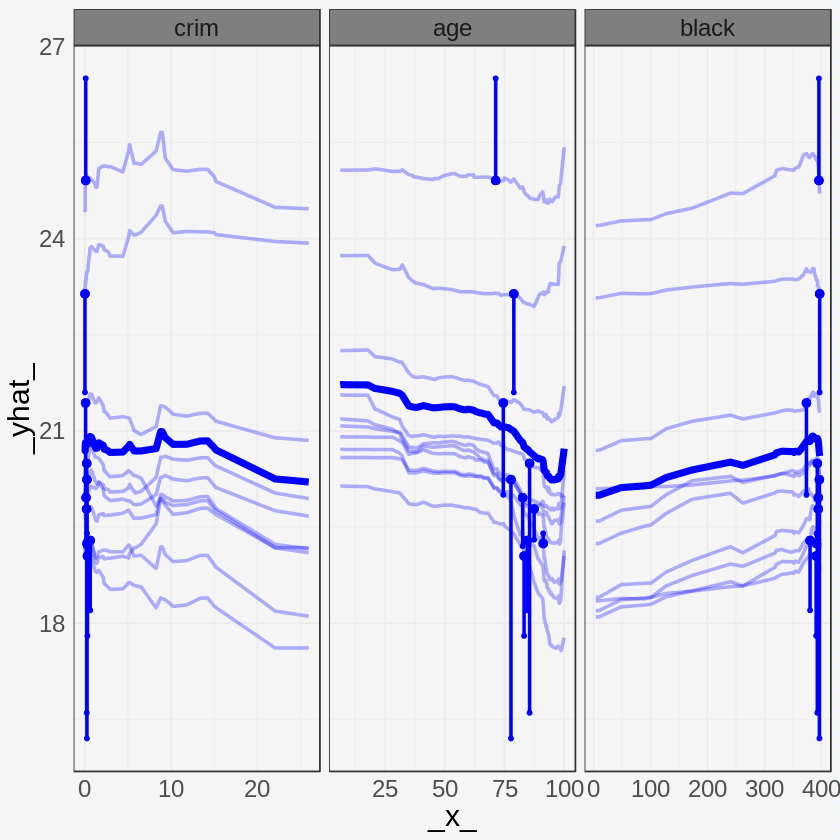

In [22]:
cp_rf_B <- ceteris_paribus(explainer_rf, house_B, y = house_B$medv)

plot(cp_rf_B, color="blue", show_profiles = TRUE, show_observations = TRUE, show_residuals=TRUE,
    selected_variables=c("crim", "black", "age")) + 
      ceteris_paribus_layer(cp_rf_B, color="blue",
            aggregate_profiles = mean, size = 2, alpha = 1,
            selected_variables = c("crim","black", "age"))

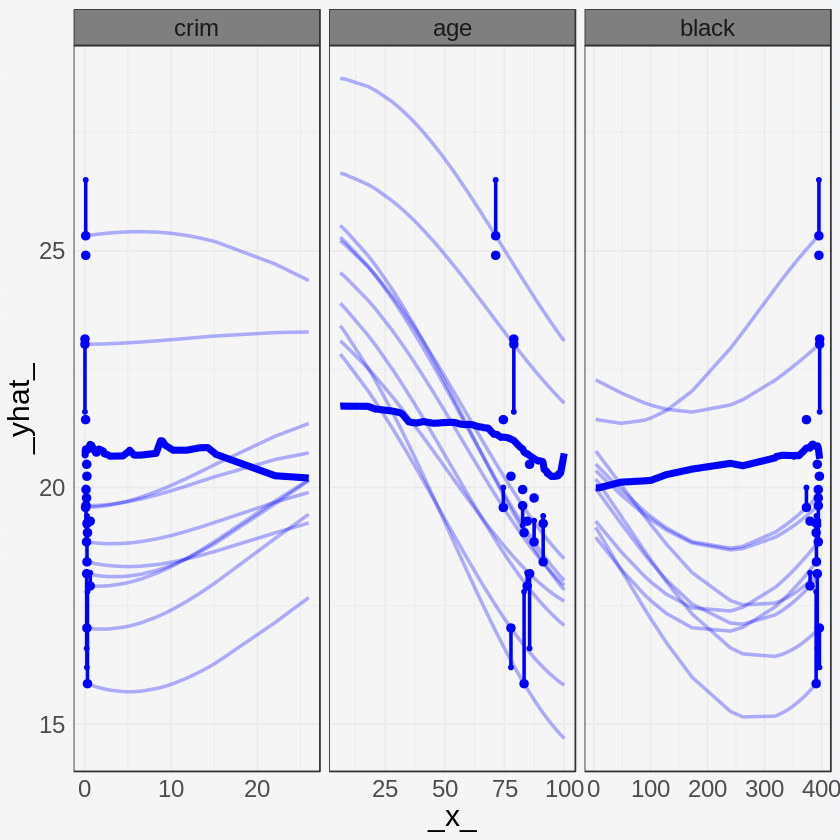

In [27]:
cp_svm_B <- ceteris_paribus(explainer_svm, house_B, y = house_B$medv)

plot(cp_svm_B, color="blue", show_profiles = TRUE, show_observations = TRUE, show_residuals=TRUE,
    selected_variables=c("crim", "black", "age")) + 
      ceteris_paribus_layer(cp_rf_B, color="blue",
            aggregate_profiles = mean, size = 2, alpha = 1,
            selected_variables = c("crim","black", "age"))

In [23]:
house_C <- select_neighbours(housing_test, housing_test[22,], n = 30)

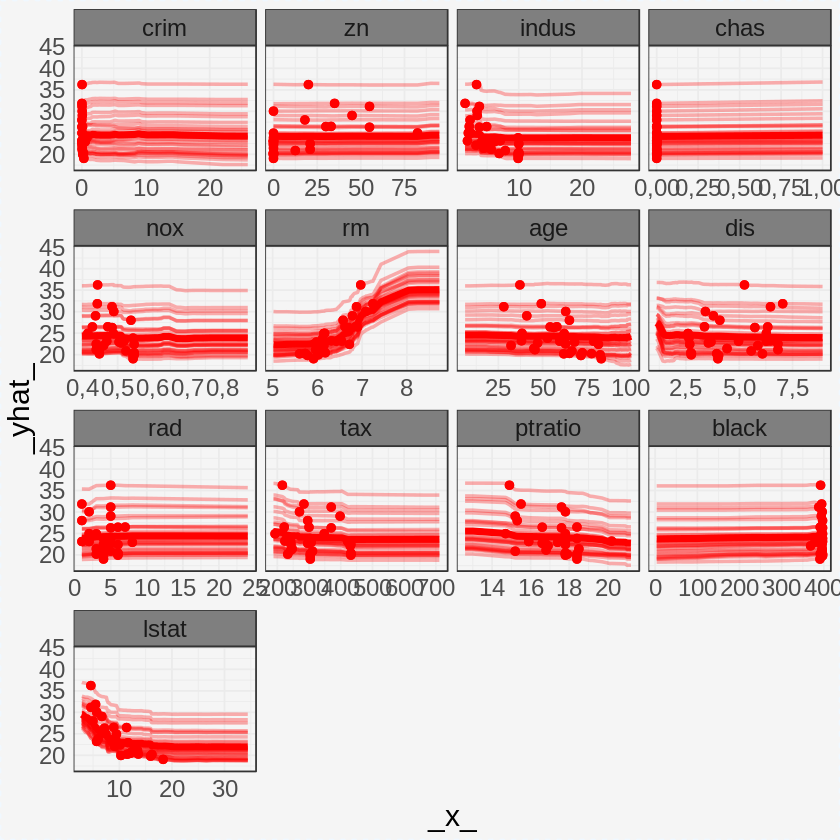

In [24]:
cp_rf_C <- ceteris_paribus(explainer_rf, house_C, y = house_C$medv)

plot(cp_rf_C, color="red") +   ceteris_paribus_layer(cp_rf_C, color="red",
            aggregate_profiles = mean, size = 2, alpha = 1) 

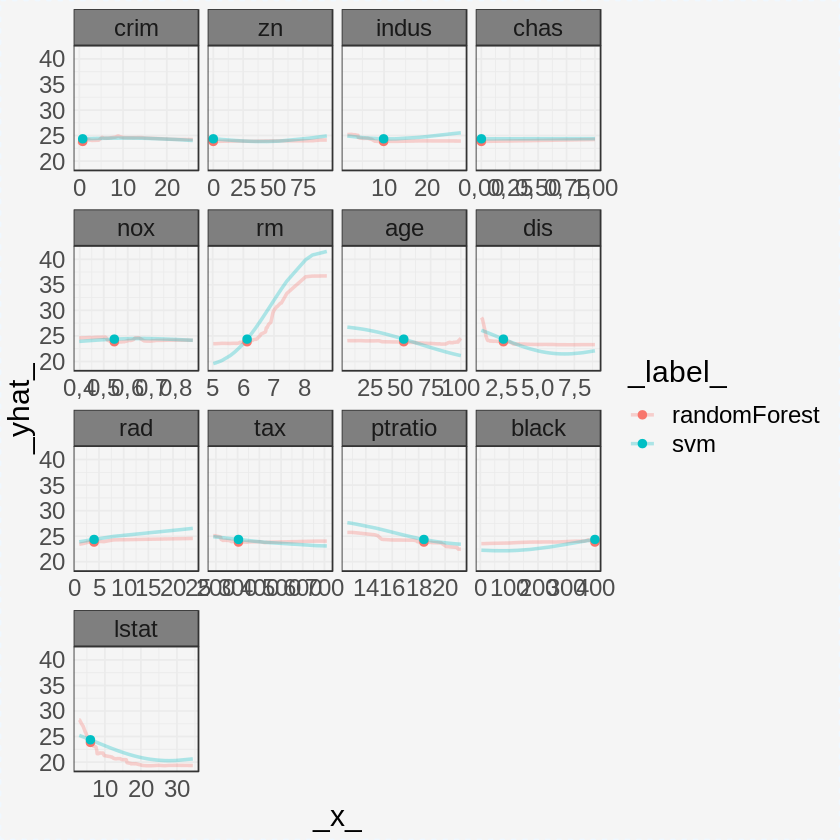

In [26]:
plot(cp_rf_A, cp_svm_A, color="_label_")